#붓꽃 품종 분류


In [ ]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 데이터 불러오기

In [ ]:
# 파일 경로 설정하기
file_path = '/content/drive/MyDrive/데이터분석/데이터/iris_dataset.csv'

# pd.read_csv() 사용
df_iris = pd.read_csv(file_path)

# 결과 확인
print(df_iris)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

         label  
0       se

## 데이터 전처리
#### 이상치 제거를 해야 하지만, 여기서는 하지 않는다.
#### 회귀라면 반드시 제거해줘야 하는데,
#### 분류라면 이상치를 꼭 민감하게 제거할 필요는 없다.

*** 오늘은 이걸 적용한다.***
#### feature engineering : 문자를 숫자로 바꿔줘야 한다.
#### label encoding 또는 one-hot encoding을 적용한다.


In [ ]:
### 붓꽃 품종의 label 컬럼의 값 ---> 숫자로 변환  --> label encoding

print(df_iris.loc[:,'label'].unique())

df_label = df_iris.replace({'setosa':0, 'versicolor':1, 'virginica':2})

# 결과 확인하기
print(df_label)

['setosa' 'versicolor' 'virginica']
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1              

In [ ]:
### 붓꽃 품종의 label 컬럼의 값 ---> 숫자로 변환  --> One-Hot encoding
df_onehot = pd.get_dummies(data = df_iris, columns = ['label'], dtype = int)  # dtype 을 붙이지 않으면 true, false로 보인다.

# 결과 확인하기
print(df_onehot)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     label_setosa  label_ve

## 학습용 데이터와 평가용 데이터 생성

In [ ]:
### colab의 sklearn version 확인
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
# 필요한 함수 임포트
from sklearn.model_selection import train_test_split
# X_data 생성
X_data = df_label.drop(columns = ['label'])  # 이건 전체에서 label 컬럼만 삭제
X_data1 = df_label.iloc[:,0:4]               # 이건 slicing 으로 지정
print(f'X_data 확인 : \n {X_data}')
print(f'X_data1 확인 : \n {X_data1}')

print('-'*80)

# y_data 생성
y_data = df_label.loc[:,'label']
print(f'y_data 확인: \n {y_data}')

# train_test_split 함수 적용
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.25, random_state = 0)  # stratify 를 넣을 수도 있다.

X_data 확인 : 
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
X_data1 확인 : 
      sepal 

In [ ]:
# 학습용 데이터 확인

# 전체 데이터 확인
print(f'X_train 확인 \n{X_train}')
print(f'y_train 확인 \n{y_train}')

# 데이터의 인덱스 확인
print(f'X_train의 index 확인 : \n{X_train.index}')

print(f'y_train의 index 확인 : \n{y_train.index}')

# 정답의 품종별 빈도수 확인
counts = y_train.value_counts()
print(f'학습용 데이터의 품종별 빈도수 : \n {counts}')
# 47,37,34가 나오는데, 실 데이터는 1:1:1이니까 이에 맞추기 위해서..stratify라는 매개변수를 이용한다.
# 즉, stratify 는 실제 데이터 분포와 맞춰서 샘플링 해주는 기능

X_train 확인 
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
61                 5.9               3.0                4.2               1.5
92                 5.8               2.6                4.0               1.2
112                6.8               3.0                5.5               2.1
2                  4.7               3.2                1.3               0.2
141                6.9               3.1                5.1               2.3
..                 ...               ...                ...               ...
9                  4.9               3.1                1.5               0.1
103                6.3               2.9                5.6               1.8
67                 5.8               2.7                4.1               1.0
117                7.7               3.8                6.7               2.2
47                 4.6               3.2                1.4               0.2

[112 rows x 4 columns]
y_train 확인 
61     1
92     

In [ ]:
# stratify를 넣어서 다시..
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.25, random_state = 0, stratify = y_data)  # stratify 를 넣어서 다시
print(f'X_train 확인 \n{X_train}')
print('-'*80)
print(f'y_train 확인 \n{y_train}')
print('-'*80)
# 데이터의 인덱스 확인
print(f'X_train의 index 확인 : \n{X_train.index}')
print('-'*80)
print(f'y_train의 index 확인 : \n{y_train.index}')
print('-'*80)
# 정답의 품종별 빈도수 확인
counts = y_train.value_counts()
print(f'학습용 데이터의 품종별 빈도수 : \n {counts}')


X_train 확인 
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
60                 5.0               2.0                3.5               1.0
1                  4.9               3.0                1.4               0.2
8                  4.4               2.9                1.4               0.2
93                 5.0               2.3                3.3               1.0
106                4.9               2.5                4.5               1.7
..                 ...               ...                ...               ...
66                 5.6               3.0                4.5               1.5
29                 4.7               3.2                1.6               0.2
130                7.4               2.8                6.1               1.9
141                6.9               3.1                5.1               2.3
111                6.4               2.7                5.3               1.9

[112 rows x 4 columns]
----------------------------

In [ ]:
# sklearn 최신버전을 설치하고 싶으면 아래와 같은 명령어로..
# !pip install sklearn == 1.5.0

## 모델 생성

In [ ]:
# 필요한 함수 임포트
from sklearn.tree import DecisionTreeClassifier

# 모델 생성 함수 호출, 모델(x) 객체(o) 생성
# 대문자로 시작하는 함수는 클래스함수라고 한다.
dt = DecisionTreeClassifier(random_state = 0)

## 모델 학습

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

## 모델 학습시 생성된 의사결정 트리 구조 시각화

In [ ]:
# decision tree methods 중에 get_depth()는 decision tree의 depth를 알 수 있다
dt.get_depth()

4

In [ ]:
# 이건 무슨 기능의 함수지?
dt.decision_path()

TypeError: BaseDecisionTree.decision_path() missing 1 required positional argument: 'X'

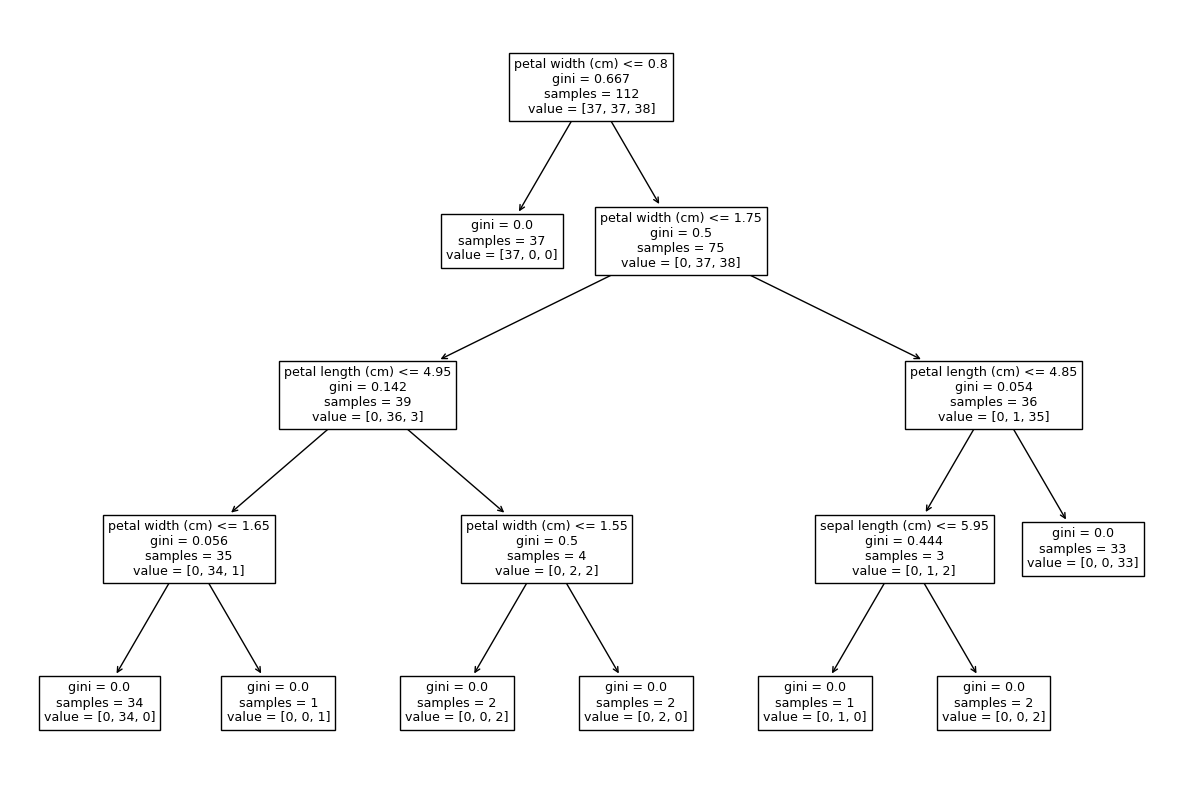

In [ ]:
# 함수 import
from sklearn.tree import plot_tree

# 이미지 크기 재설정
plt.figure(figsize = (15,10))

# 함수 호출, 시각화
plot_tree(decision_tree = dt, feature_names = X_train.columns)    # feature_names가 없으면 x[0], x[1] 이런식으로 나옴
plt.savefig('/content/drive/MyDrive/데이터분석/dt.png')
plt.show()

## 학습용 / 평가용 데이터를 이용한 예측

In [ ]:
# 학습용 데이터에 대한 예측
pred_train = dt.predict(X_train)
print(f'학습용 데이터에 대한 예측 : \n{pred_train}')
print("*"*80)
print(f'학습용 데이터에 대한 정답 : \n{y_train.values}')   # 리스트이므로 numpy로 바꾸기 위해서 .value
# pred_train은 결과는 쉼표가 없으므로 numpy배열이다.
# y_train은 list이다.
print("*"*80)
print(type(pred_test))
print(type(y_test))
print("*"*80)
# 학습용 데이터에 대한 예측 정확도 측정 --> 비교연산
bool_arr = (pred_train == y_train.values)
print(f'비교연산의 결과 : \n{bool_arr}')

학습용 데이터에 대한 예측 : 
[1 0 0 1 2 2 1 0 1 0 0 1 0 2 0 1 1 1 1 2 2 1 0 2 2 2 2 1 1 2 2 2 1 0 0 2 2
 1 1 2 2 0 0 1 0 1 2 0 0 2 1 2 1 0 0 0 0 2 0 1 1 1 2 0 1 1 0 1 2 1 2 0 1 2
 2 1 2 0 1 0 0 2 1 2 0 0 0 0 0 1 2 2 2 0 2 0 2 0 1 1 1 1 0 2 2 0 1 1 0 2 2
 2]
********************************************************************************
학습용 데이터에 대한 정답 : 
[1 0 0 1 2 2 1 0 1 0 0 1 0 2 0 1 1 1 1 2 2 1 0 2 2 2 2 1 1 2 2 2 1 0 0 2 2
 1 1 2 2 0 0 1 0 1 2 0 0 2 1 2 1 0 0 0 0 2 0 1 1 1 2 0 1 1 0 1 2 1 2 0 1 2
 2 1 2 0 1 0 0 2 1 2 0 0 0 0 0 1 2 2 2 0 2 0 2 0 1 1 1 1 0 2 2 0 1 1 0 2 2
 2]
********************************************************************************
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
********************************************************************************
비교연산의 결과 : 
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  T

In [ ]:
# 평가용 데이터에 대한 예측
pred_test = dt.predict(X_test)
print(f'평가용 데이터에 대한 예측 : \n{pred_test}')

print('-'*80)

#평가용 데이터에 대한 정답 --> y.test 확인
print(f'평가용 데이터에 대한 정답 : \n{y_test.values}')

print('-'*80)

# 평가용 데이터에 대한 예측 정확도 측정 --> 비교연산
bool_arr = (pred_test == y_test.values)
print(f'비교연산의 결과 : \n{bool_arr}')

평가용 데이터에 대한 예측 : 
[0 0 0 0 1 1 1 0 1 1 2 2 1 2 1 0 0 2 0 1 2 1 1 0 2 0 0 1 2 1 0 1 2 2 0 1 2
 2]
--------------------------------------------------------------------------------
평가용 데이터에 대한 정답 : 
[0 0 0 0 1 1 1 0 1 2 2 2 1 2 1 0 0 2 0 1 2 1 1 0 2 0 0 1 2 1 0 1 2 2 0 1 2
 2]
--------------------------------------------------------------------------------
비교연산의 결과 : 
[ True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


## 모델평가

In [ ]:
# 정확도를 평가하기 위해서 필요한 함수 임포트

from sklearn.metrics import accuracy_score

# 평가용 데이터에 대한 정확도 평가
accuracy = accuracy_score(y_true = y_test, y_pred = pred_test)

# 결과 확인하기
print(f'평가용 데이터에 대한 정확도 : {accuracy}')

평가용 데이터에 대한 정확도 : 0.9736842105263158
